In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier

In [11]:
data = loader.load_adult_data()
data.shape

(32561, 109)

In [12]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [13]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [22]:
base_tree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [23]:
basic = AdaBoostClassifier(base_estimator=base_tree)
# basic.get_params()
n_trees = [10, 25, 50]
alphas = [0, .001, 0.0025, .01]
# max_depth = range(2, 11)
param_grid = dict(n_estimators=n_trees, base_estimator__ccp_alpha=alphas)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train, y_train)

In [24]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
base_estimator__ccp_alpha n_estimators                                
0.0025                    25                17.502893      0.960171   
                          50                35.520115      2.371310   
                          10                 7.193724      0.474814   
0.0010                    10                 8.568175      0.326114   
0.0100                    10                 5.970859      0.367510   
                          25                14.617631      0.664906   
                          50                29.844664      1.190854   
0.0010                    50                44.675716      6.340268   
                          25                22.696713      1.210107   
0.0000                    50                 0.481131      0.009462   
                          25                 0.494870      0.015892   
                          10                 0.505901      0.013986   

                                        mean_score_time  std_score_time  \
base_estimator__ccp_alpha n_estimators                                    
0.0025                    25                   0.088497        0.004321   
                          50                   0.178132        0.013623   
                          10                   0.045559        0.004089   
0.0010                    10                   0.049728        0.007550   
0.0100                    10                   0.043118        0.005858   
                          25                   0.092372        0.005548   
                          50                   0.192391        0.020520   
0.0010                    50                   0.195658        0.025187   
                          25                   0.106779        0.009902   
0.0000                    50                   0.012551        0.001306   
                          25                   0.012300        0.000835   
                          10                   0.017367        0.007045   

                                        mean_test_score  std_test_score  \
base_estimator__ccp_alpha n_estimators                                    
0.0025                    25                   0.860609        0.006789   
                          50                   0.860609        0.006789   
                          10                   0.860345        0.006703   
0.0010                    10                   0.856046        0.006935   
0.0100                    10                   0.852229        0.004868   
                          25                   0.852229        0.004868   
                          50                   0.852229        0.004868   
0.0010                    50                   0.841610        0.011302   
                          25                   0.832046        0.012592   
0.0000                    50                   0.813443        0.006987   
                          25                   0.812083        0.006668   
                          10                   0.811732        0.006869   

                                        rank_test_score  mean_train_score  \
base_estimator__ccp_alpha n_estimators                                      
0.0025                    25                          1          0.865326   
                          50                          1          0.863790   
                          10                          3          0.863790   
0.0010                    10                          4          0.892539   
0.0100                    10                          5          0.853315   
                          25                          5          0.853315   
                          50                          5          0.853315   
0.0010                    50                          8          0.960139   
                          25                          9          0.974476   
0.0000                    50                         10          1.000000   
                   

In [26]:
res_df.sort_values(by='mean_fit_time')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  \
base_estimator__ccp_alpha n_estimators                                   
0.0000                    50                 0.481131         0.012551   
                          25                 0.494870         0.012300   
                          10                 0.505901         0.017367   
0.0100                    10                 5.970859         0.043118   
0.0025                    10                 7.193724         0.045559   
0.0010                    10                 8.568175         0.049728   
0.0100                    25                14.617631         0.092372   
0.0025                    25                17.502893         0.088497   
0.0010                    25                22.696713         0.106779   
0.0100                    50                29.844664         0.192391   
0.0025                    50                35.520115         0.178132   
0.0010                    50                44.675716         0.195658   

                                        mean_test_score  mean_train_score  
base_estimator__ccp_alpha n_estimators                                     
0.0000                    50                   0.813443          1.000000  
                          25                   0.812083          1.000000  
                          10                   0.811732          1.000000  
0.0100                    10                   0.852229          0.853315  
0.0025                    10                   0.860345          0.863790  
0.0010                    10                   0.856046          0.892539  
0.0100                    25                   0.852229          0.853315  
0.0025                    25                   0.860609          0.865326  
0.0010                    25                   0.832046          0.974476  
0.0100                    50                   0.852229          0.853315  
0.0025                    50                   0.860609          0.863790  
0.0010                    50                   0.841610          0.960139

In [27]:
res_df.xs(0.01, level='base_estimator__ccp_alpha')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
n_estimators,,,,,,,,,
10,5.970859,0.367510,0.043118,0.005858,0.852229,0.004868,5,0.853315,0.001773
25,14.617631,0.664906,0.092372,0.005548,0.852229,0.004868,5,0.853315,0.001773
50,29.844664,1.190854,0.192391,0.020520,0.852229,0.004868,5,0.853315,0.001773


In [30]:
res_df.xs(0.001, level='base_estimator__ccp_alpha')[helpers.get_useful_cv_columns()]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
n_estimators,,,,
10,8.568175,0.049728,0.856046,0.892539
25,22.696713,0.106779,0.832046,0.974476
50,44.675716,0.195658,0.841610,0.960139


In [29]:
res_df.xs(0.0025, level='base_estimator__ccp_alpha')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
n_estimators,,,,,,,,,
10,7.193724,0.474814,0.045559,0.004089,0.860345,0.006703,3,0.863790,0.002666
25,17.502893,0.960171,0.088497,0.004321,0.860609,0.006789,1,0.865326,0.004357
50,35.520115,2.371310,0.178132,0.013623,0.860609,0.006789,1,0.863790,0.002666


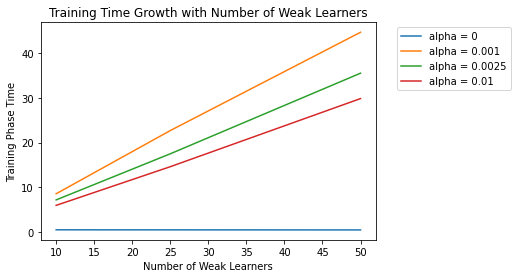

In [35]:
for alpha in alphas:
    plt.plot(n_trees, res_df.xs(alpha, level='base_estimator__ccp_alpha')['mean_fit_time'], label=f"alpha = {alpha}")
plt.title('Training Time Growth with Number of Weak Learners')
plt.ylabel('Training Phase Time')
plt.xlabel('Number of Weak Learners')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.show()

In [37]:
best_base_tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.0025, random_state=1)
best_model = AdaBoostClassifier(base_estimator=best_base_tree, n_estimators=25)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
print(f"Final accuracy achieved: {accuracy_score(y_test, y_test_pred)}")

Final accuracy achieved: 0.8533114955471389


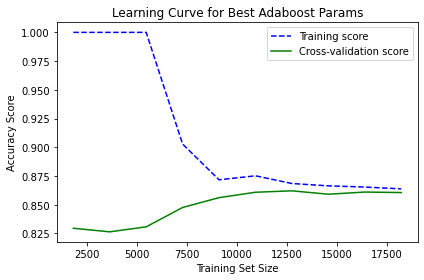

In [33]:
plot.plot_learning_curve(best_model, X_train, y_train, title='Learning Curve for Best Adaboost Params')